<a href="https://colab.research.google.com/github/ttogle918/AI_practice/blob/main/dacon_%EC%9D%8C%EC%84%B1_%EB%B6%84%EB%A5%98_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/data_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DACON sample 코드

[[EDA] 음성 데이터 분석 입문자를 위한 데이터 살펴보기](https://dacon.io/competitions/official/235905/codeshare/5138?page=1&dtype=recent)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# data 분석

In [16]:
train_path = '/content/drive/MyDrive/Colab Notebooks/dataset/dacon/user_data/train/'
train_csv_path = '/content/drive/MyDrive/Colab Notebooks/dataset/dacon/user_data/train.csv'

In [4]:
train = pd.read_csv(train_csv_path)
train.head()

,file_name,label
0,001.wav,9
1,002.wav,0
2,004.wav,1
3,005.wav,8
4,006.wav,0


In [5]:
train.shape

(400, 2)

In [11]:
# 같은 결과
train.label.groupby(train.label).count()
# train.label.value_counts()

label
0    40
1    40
2    40
3    40
4    40
5    40
6    40
7    40
8    40
9    40
Name: label, dtype: int64

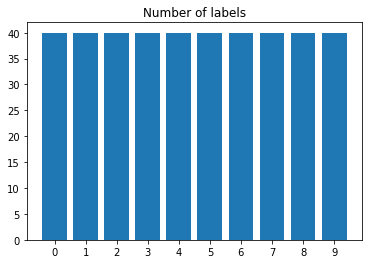

In [13]:
# 분포 확인
Y = train.label.groupby(train.label).count()
X = Y.index
plt.bar(X, Y)
plt.xticks(X)
plt.title("Number of labels")
plt.show()

In [17]:
def get_audio(num = 0):
    # Audio Sample Directory
    sample = os.listdir(train_path)
    temp = train[train.label == num].file_name
    file_name = temp[temp.index[0]]
    
    file = train_path + file_name
    # Get Audio from the location
    data,sample_rate = librosa.load(file)
    
    # Plot the audio wave
    dsp.waveshow(data,sr=sample_rate)
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

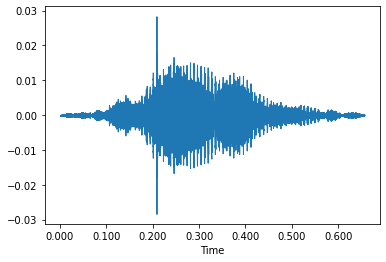

In [18]:
get_audio(0)

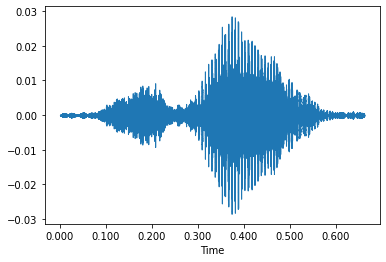

In [20]:
get_audio(3)

## 퓨리에 변환

숫자마다 에너지 분포가 상이하다.


In [23]:
def fourier_transform(num = 0):
    # Audio Sample Directory
    sample = os.listdir(train_path)
    temp = train[train.label == num].file_name
    file_name = temp[temp.index[0]]
    
    file = train_path + file_name
    # Get Audio from the location
    data,sample_rate = librosa.load(file)

    fft = np.fft.fft(data) 

    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))

    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    fig = plt.figure(figsize = (14,5))
    plt.plot(left_frequency, left_magnitude)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title(f"Fourier transform of audio label {num}")
    plt.show()

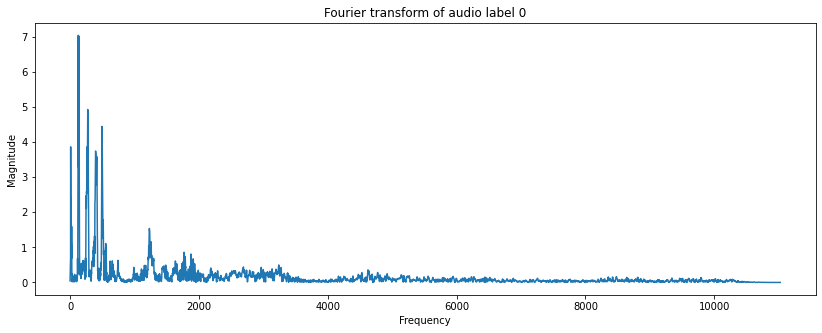

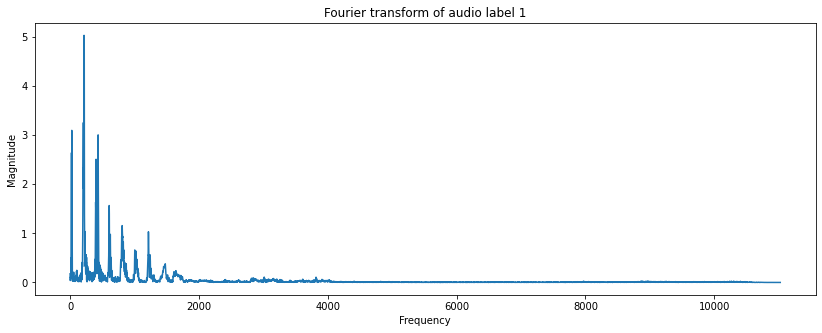

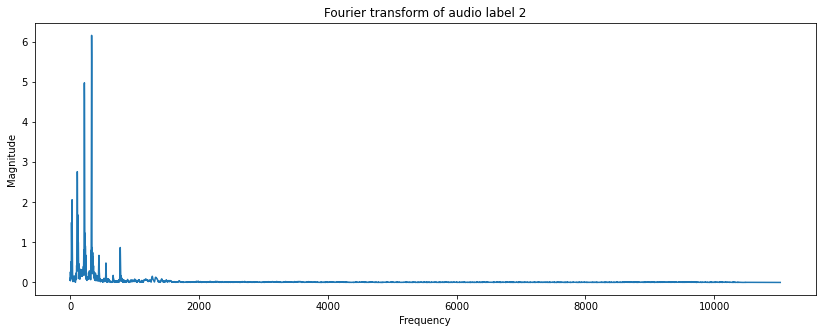

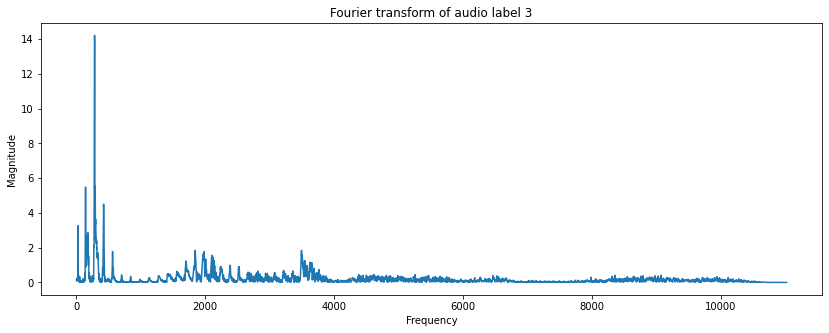

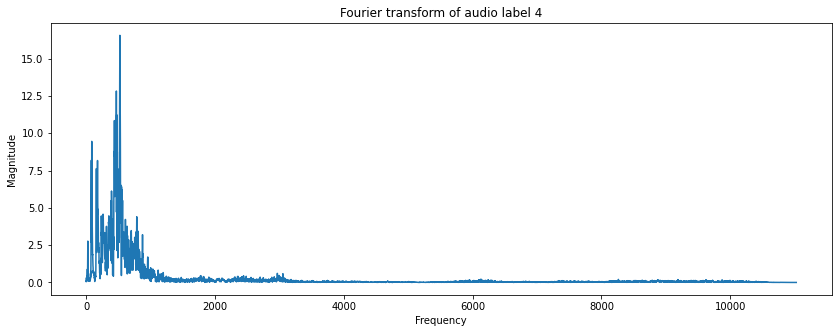

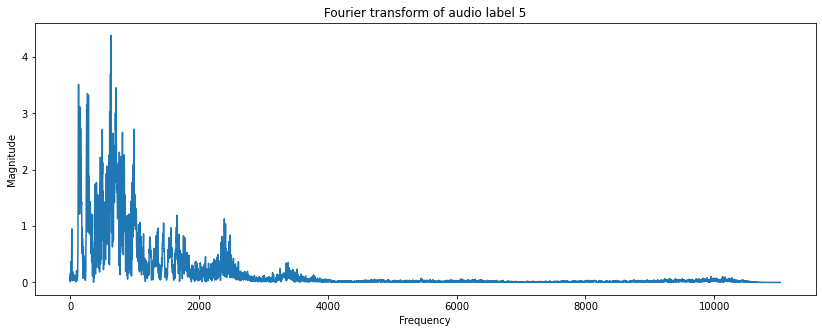

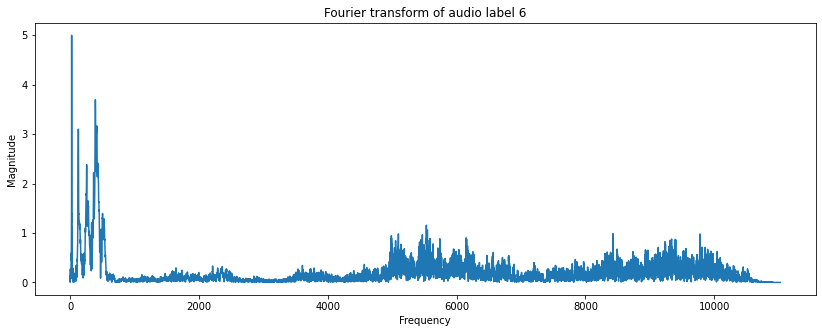

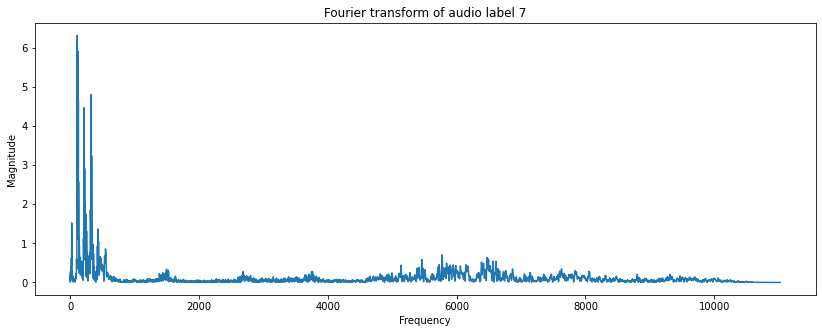

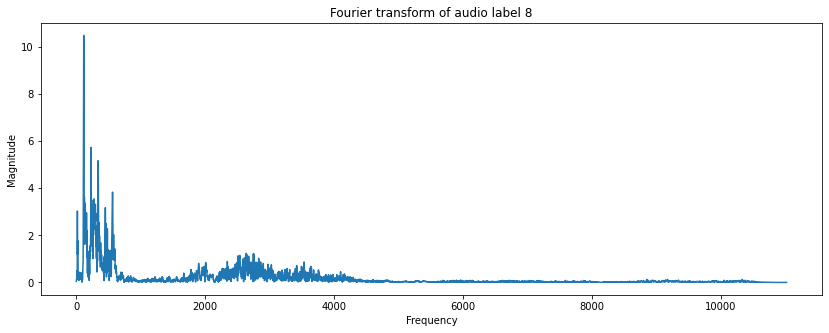

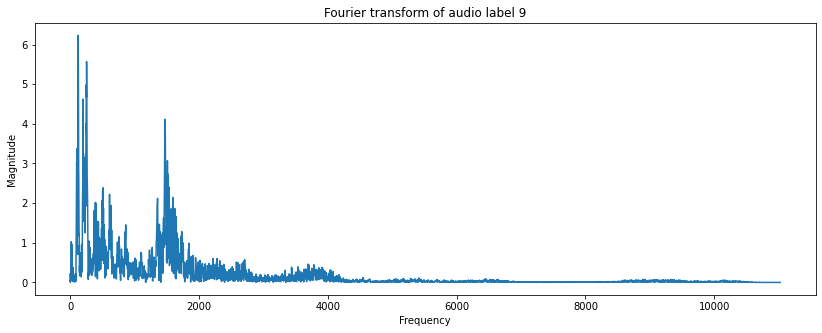

In [24]:
for i in range(0,10):
    fourier_transform(i)

## Mel Spectrogram

- **Spectogram**은 소리나 파동을 시각화하여 파악하기 위한 도구로, 파형(waveform)과 스펙트럼(spectrum)의 특징이 조합되어 있습니다.

- Mel Spetrogram은 주파수를 mel-scale로 변환한 형태입니다.
  - 낮은 주파수를 높은 주파수보다 더 예민하게 받아들이므로 이 주파수를 mel scale로 볼 수 있게 하는 방법입니다.

- Mel-scale
  - Mel은 사람의 달팽이관을 모티브로 따온 값입니다.
  - 달팽이관은 주파수가 낮은 대역에서는 변화하는 주파수를 잘 감지하는데,
  - 주파수가 높은 대역에서는 주파수 감지를 잘 하지 못합니다. (주파수 간격이 넓어짐)
  - 이러한 원리를 이용해서 filter, scaling 해줄 수 있는데, 이때 이 기준을 Mel-Scale 이라고 합니다.
  - => 사람이 인식하지 못하는 부분의 오디오 데이터를 제거하는 scaling 방법

## Argument
1. n_fft : 한 번 fft를 해 줄 만큼의 sequence 길이
  - 여기서 n_fft는 window size라고도 부르는데, frame의 length를 결정하는 파라미터 입니다.
  - 사람의 목소리는 대부분 16000Hz 안에 포함이 되는데,
  - 일반적으로 자연어 처리에서는 음성을 25m의 크기를 기본으로 하고 있습니다.
  - 따라서 16000Hz인 음성에서는 25m의 음성의 크기를 가지고 있으면 n_fft는 16000 * 0.025 = 400 (sampling rate * frame_length = n_fft)가 됩니다.

2. hop_length : window 간의 거리
  - hop_length도 마찬가지로 window 간의 거리이므로 sampling rate * frame_stride 가 됩니다.

3. win_length : 윈도우 길이
  - 보통 win_length를 지정하지 않으면 n_fft가 됩니다.

In [28]:
def Mel_s(num = 0, frame_length = 0.025, frame_stride = 0.010):

    sample = os.listdir(train_path)
    temp = train[train.label == num].file_name
    file_name = temp[temp.index[0]]
    
    file = train_path + file_name
    data,sample_rate = librosa.load(file, sr = 16000)
    
    input_nfft = int(round(sample_rate*frame_length))
    input_stride = int(round(sample_rate*frame_stride))
    
    S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)
    
    print("Wav length: {}, Mel_S shape:{}".format(len(data)/sample_rate, np.shape(S)))
    
    S_dB  = librosa.power_to_db(S, ref=np.max)
    fig = plt.figure(figsize = (14,5))
    librosa.display.specshow(S_dB, 
                             sr=sample_rate, 
                             hop_length=input_stride,
                             x_axis='time',
                             y_axis='log')
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel spectrogram of audio label {num}")
    plt.show()

Wav length: 0.6563125, Mel_S shape:(100, 66)


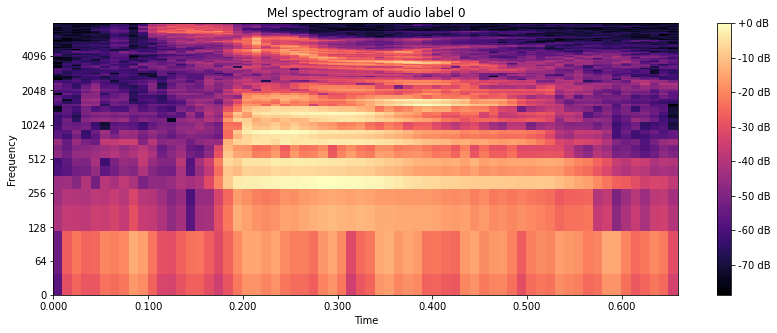

Wav length: 0.6455, Mel_S shape:(100, 65)


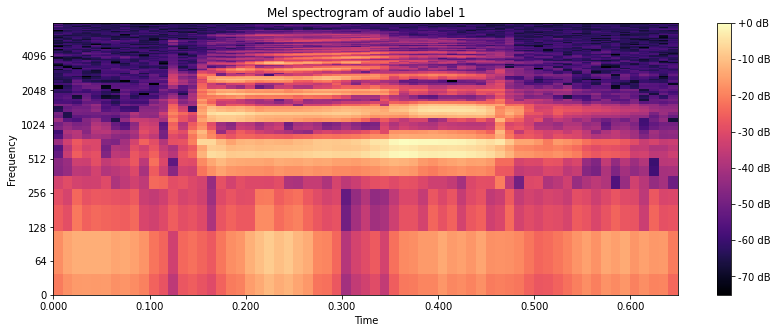

Wav length: 0.544375, Mel_S shape:(100, 55)


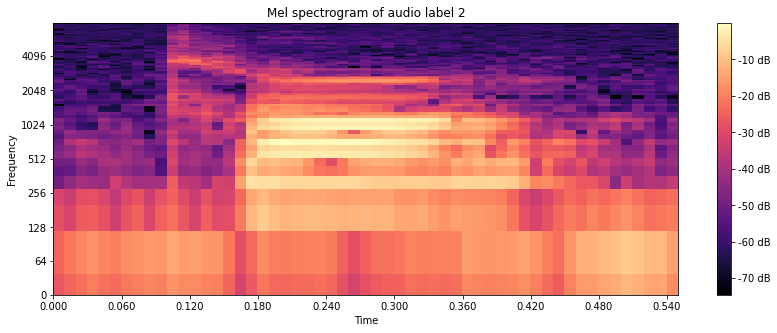

Wav length: 0.661625, Mel_S shape:(100, 67)


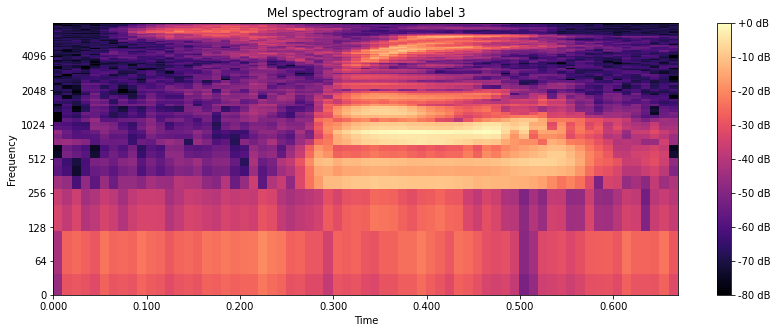

Wav length: 0.6255625, Mel_S shape:(100, 63)


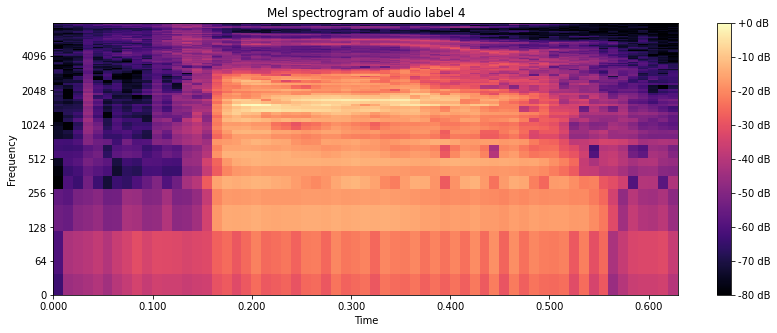

Wav length: 0.540125, Mel_S shape:(100, 55)


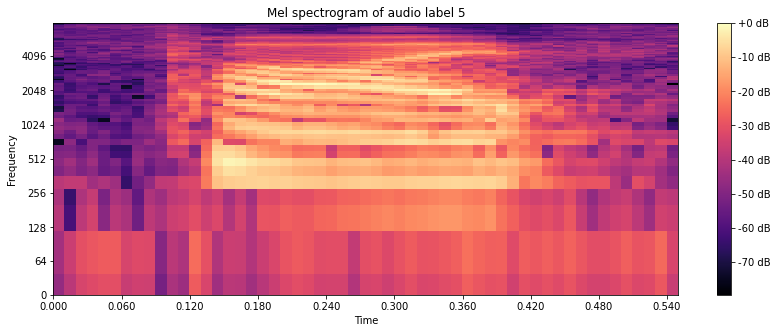

Wav length: 0.7418125, Mel_S shape:(100, 75)


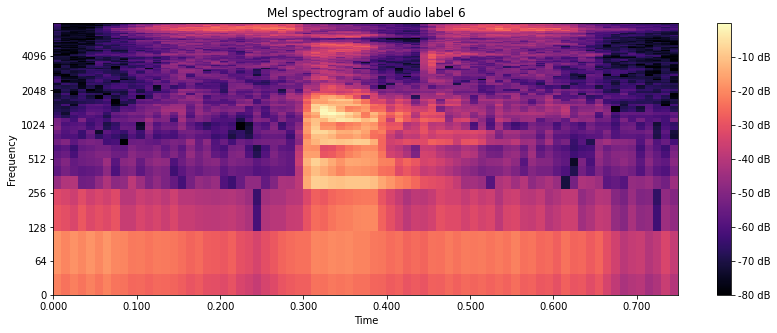

Wav length: 0.707875, Mel_S shape:(100, 71)


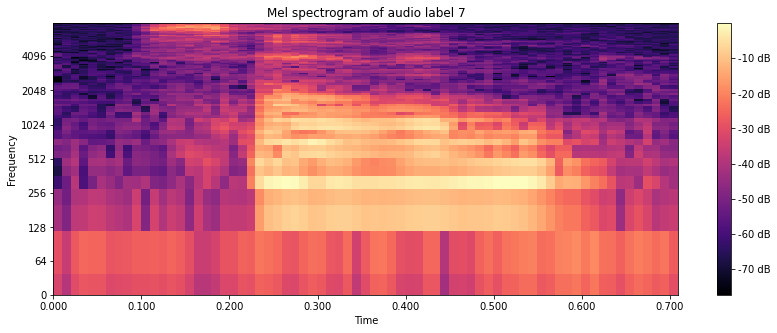

Wav length: 0.487625, Mel_S shape:(100, 49)


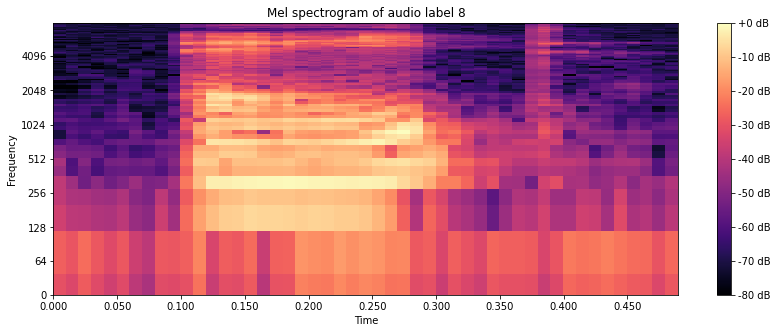

Wav length: 0.637, Mel_S shape:(100, 64)


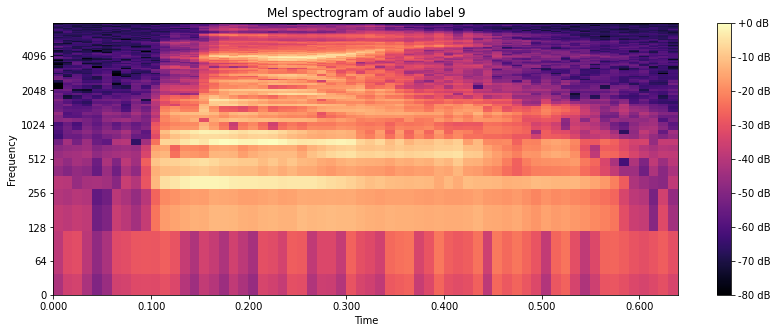

In [29]:
for i in range(0,10):
    Mel_s(i)

# 베이스라인

In [30]:
# audio 전처리를 위한 lib
import librosa
import librosa.display as dsp
from IPython.display import Audio

In [31]:
# 데이터 전처리를 위한 lib
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [32]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(929)

In [33]:
import pandas as pd
train = pd.read_csv(train_csv_path)
train.head()

,file_name,label
0,001.wav,9
1,002.wav,0
2,004.wav,1
3,005.wav,8
4,006.wav,0


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  400 non-null    object
 1   label      400 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [36]:
data, sample_rate = librosa.load(f'{train_path}001.wav', sr = 16000)
print('sample_rate:', sample_rate, ', audio shape:', data.shape)
print('length:', data.shape[0]/float(sample_rate), 'secs')

sample_rate: 16000 , audio shape: (10192,)
length: 0.637 secs


- sample_rate: 16000
  - 초당 16000개(16000Hz 주파수)의 샘플을 가지고 있는 데이터, 1초에 음성 신호를 16000번 샘플링
  - default : 22050Hz
  - 16000Hz로 설정한 이유 : 사람의 목소리는 대부분 16000Hz안에 포함되기 때문이다.
audio shape: (10192,)
length: 0.637 secs = sample_rate * audio_shape

## dataframe 생성

In [43]:
# 증식할 필요성
def train_dataset():
    dataset = []
    for file in tqdm(os.listdir(train_path),colour='green'):
        if 'wav' in file:
            abs_file_path = os.path.join(train_path,file)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = int(train[train.file_name == file].label)
            dataset.append([data,class_label])
    
    print("Dataset 생성 완료")
    return pd.DataFrame(dataset,columns=['data','label'])

In [44]:
train_wav = train_dataset()

100%|██████████| 400/400 [00:18<00:00, 21.50it/s]

Dataset 생성 완료


In [45]:
train_wav.head()

,data,label
0,"[0.00027186112, 0.00052218814, 0.00040256415, ...",1
1,"[0.00011985076, 0.00016174652, 0.00017246709, ...",9
2,"[3.6655838e-05, -3.7366447e-06, 3.4776433e-05,...",5
3,"[-0.00010774565, -0.0001280595, -0.00013393736...",0
4,"[9.2610695e-05, 0.00018442213, 0.00021447388, ...",7


In [47]:
train_wav.data.iloc[0]

array([0.00027186, 0.00052219, 0.00040256, ..., 0.00032481, 0.00031971,
       0.        ], dtype=float32)

## 음성 데이터 특징 추출


#### 퓨리에 변환

음성 데이터를 분석하기 위하여 주파수(frequency)를 성분을 뽑아내야 한다면 퓨리에 변환(Fourier Transform)을 해야 합니다.

퓨리에 변환은 간단히 설명하자면 '입력 신호를 다양한 주파수를 가지는 주기함수들로 분해하는 것' 입니다.

주기함수들을 분해함으로써 음성 데이터에서 노이즈 및 배경 소리로 부터 실제로 유용한 소리의 데이터, 즉 특징을 추출하는 것 입니다.

#### MFCC (Mel-frequency cepstral coefficients)
하지만 음성데이터 전체를 퓨리에 변환을 한다면,

예를들어 "안녕하세요"라고 하더라도, 어떤 사람은 1초, 어떤 사람은 3초가 걸릴 수도 있습니다.

따라서 이 천차만별인 길이에 대하여 같은 "안녕하세요"라는 음성이라고 학습시키기는 어려울 것입니다.

위와 같은 문제를 해결하기 위하여 MFCC (Mel-frequency cepstral coefficients) 알고리즘을 이용합니다.

MFCC는 음성데이터를 특징벡터화 해주는 알고리즘입니다.

입력된 소리 전체를 대상으로 하는 것이 아니라,

사람이 인지하기 좋은 Mel-scale로 음성데이터를 모두 20~40ms로 나누어 이 구간에 대한 스펙트럼을 분석하여

퓨리에 변환을 한 특징 추출 방법입니다.

사람의 음성은 20~40ms 사이에서는 음소(현재 내고 있는 발음)가 바뀔 수 없다는 연구결과들을 기반으로

음소는 해당 시간내에 바뀔 수 없다고 가정합니다.

따라서 MFCC에서는 음성데이터를 모두 20~40ms 단위로 쪼개고,

쪼갠 단위에 대해서 Mel 값을 뽑아서 Feature로 사용합니다.

파이썬에서는 librosa.feature.mfcc(wav) 메소드 이용하여

손쉽게 MFCC 알고리즘을 이용합니다.

#### Mel-scale
Mel은 사람의 달팽이관을 모티브로 따온 값입니다.

달팽이관은 주파수가 낮은 대역에서는 변화하는 주파수를 잘 감지하는데,

주파수가 높은 대역에서는 주파수 감지를 잘 하지 못합니다. (주파수 간격이 넓어짐)

이러한 원리를 이용해서 filter, scaling 해줄 수 있는데, 이때 이 기준을 Mel-Scale 이라고 합니다.

#### Argument
y : audio data

sr : sampling rate

n_mfcc : return 될 mfcc의 개수를 정해주는 파라미터. 더 다양한 데이터 특징을 추출하기 위해서 증가 시킵니다.

n_fft : frame의 length를 결정하는 파라미터. n_fft를 설정하면 window size가 디폴트 값으로 n_fft가 됩니다.

사람의 목소리는 대부분 16000Hz 안에 포함이 되는데, 일반적으로 자연어 처리에서는 음성을 25m의 크기를 기본으로 하고 있습니다.

(ex. 16000Hz인 음성에서는 25m의 음성의 크기를 가지고 있으면 n_fft는 16000 * 0.025 = 400 (sampling rate * frame_length = n_fft)가 됩니다.)

hop_length : 윈도우 길이를 나타냅니다. 길이만큼 옆으로 가면서 데이터를 읽습니다.

hop_length도 마찬가지로 window 간의 거리이므로 sampling rate * frame_stride 가 됩니다.

In [48]:
def extract_features(file):
    audio, sample_rate = librosa.load(file, sr = 16000)
    extracted_features = librosa.feature.mfcc(y=audio,
                                              sr=sample_rate,
                                              n_mfcc=40)

    extracted_features = np.mean(extracted_features.T,axis=0)
    return extracted_features

In [49]:
extract_features(f'{train_path}001.wav')

array([-5.4157184e+02,  1.0199717e+02, -1.0018574e+01,  4.5054619e+01,
        7.3112831e+00,  1.0971639e+01, -1.2032939e+01, -5.8687963e+00,
       -1.8881397e+00,  4.2930884e+00, -8.1847525e+00, -2.3072267e+00,
       -9.1721897e+00,  1.4182716e+01, -1.2839543e+01, -3.1000307e+00,
       -3.0502689e+00, -2.1911802e+00, -6.2639456e+00, -5.1691580e+00,
       -1.3974123e+01,  3.3810470e+00, -6.9977813e+00,  3.7736315e-01,
       -4.4287405e+00,  1.0799457e+00, -1.3639281e+00,  4.2418456e+00,
        2.3687005e+00,  2.8972096e+00,  2.6670651e+00,  1.8590584e+00,
       -3.8219376e+00, -1.6171500e-01, -1.4186366e+00, -4.1422081e+00,
       -5.3374414e+00, -9.9907333e-01, -3.3392251e+00, -4.2987290e-01],
      dtype=float32)

In [50]:
def preprocess_train_dataset(data):
    mfccs = []
    for i in data:
        extracted_features = librosa.feature.mfcc(y=i,
                                              sr=16000,
                                              n_mfcc=40)
        extracted_features = np.mean(extracted_features.T,axis=0)
        mfccs.append(extracted_features)
            
    return mfccs

mfccs = preprocess_train_dataset(train_wav.data)
mfccs = np.array(mfccs)

In [51]:
mfccs.shape

(400, 40)

In [52]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(mfccs, train_wav.label, test_size=0.25)
print('학습시킬 train 셋 : ', train_X.shape, train_y.shape)
print('검증할 val 셋 : ', test_X.shape, test_y.shape)

학습시킬 train 셋 :  (300, 40) (300,)
검증할 val 셋 :  (100, 40) (100,)


## 모델 학습 : RandomForestClassifier

Classifier 모델을 사용하는 이유는, 우리가 이번 대회에서 예측해야할 0~9 라벨이 분류 변수이기 때문입니다.

RandomForest 알고리즘에서 사용되는 의사 결정 트리는 feature 별 가지치기를 통해 데이터를 학습하는 알고리즘입니다.

의사 결정 나무에 대한 자세한 개념 설명은 데이콘 오늘의 파이썬을 참고해 주세요!

의사 결정 나무는 데이터를 쉽게 학습하는 알고리즘이지만 하나의 의사 결정 나무ㅌ를 사용하는 것은 과적합(overfitting)의 문제를 발생 시킬 수 있습니다.

여기서 과적합(overfitting)이란 학습 데이터에 과하게 학습되어 새로운 데이터를 예측하지 못하는 문제를 말합니다.

쉽게 말해 우리가 공부를 할때 암기식으로 공부를 하여 새로운 문제를 해결하지 못하는 것 입니다!

RandomForest는 여러개의 의사 결정 나무를 활용하여 과적합의 문제를 해결합니다.

여러개의 의사 결정 트리를 활용하면 하나의 트리에 대한 의존도가 낮아집니다.

이는 하나의 트리가 과적합이 되어도 전체 모델은 과적합의 문제에서 벗어날 수 있음을 의미합니다.

sklearn 패키지를 이용하면 직접 RandomForest를 구현하지 않고 모델을 사용할 수 있습니다.

이번 베이스라인에서는 sklearn에서 제공하는 RandomForestClassifier 활용해보겠습니다.

In [53]:
from sklearn.ensemble import RandomForestClassifier

# 모델 선언
model = RandomForestClassifier()

# 모델 학습
model.fit(train_X, train_y)

RandomForestClassifier()

In [54]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [55]:
# 모델의 예측과 실제 정답값을 비교합니다.
prediction = model.predict(test_X)

score = ACCURACY(test_y, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 63.00% 입니다


# test

In [56]:
test_path = '/content/drive/MyDrive/Colab Notebooks/dataset/dacon/user_data/test/'
test_csv_path = '/content/drive/MyDrive/Colab Notebooks/dataset/dacon/user_data/test.csv'

In [57]:
test = pd.read_csv(test_csv_path)
test.head()

,file_name
0,003.wav
1,008.wav
2,010.wav
3,015.wav
4,024.wav


In [58]:
def test_dataset():
    dataset = []
    for file in tqdm(os.listdir(test_path),colour='green'):
        if 'wav' in file:
            abs_file_path = os.path.join(test_path,file)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            dataset.append([data, file])
    
    print("Dataset 생성 완료")
    return pd.DataFrame(dataset,columns=['data', 'file_name'])

In [59]:
test_wav = test_dataset()

100%|██████████| 200/200 [00:10<00:00, 18.74it/s]

Dataset 생성 완료


In [60]:
mfccs_2 = preprocess_train_dataset(test_wav.data)
mfccs_2 = np.array(mfccs_2)

In [61]:
# 모델 선언
model = RandomForestClassifier()

# 모델 학습
model.fit(mfccs, train_wav.label)

# 모델 예측
prediction = model.predict(mfccs_2)

test_wav['label'] = prediction

In [62]:
test_wav.head()

,data,file_name,label
0,"[0.00027645202, 0.00047594117, 0.0004510493, 0...",010.wav,3
1,"[0.00048952625, 0.00085201755, 0.00076409266, ...",008.wav,1
2,"[-0.00054350717, -0.0008907122, -0.00071864494...",081.wav,2
3,"[-0.00018425942, -0.00029312616, -0.0002546514...",034.wav,9
4,"[-7.2237905e-05, -9.136026e-05, -2.7213714e-06...",065.wav,9


In [63]:
testset = test_wav[['file_name', 'label']]

pred_df = testset.copy()
pred_df = pred_df.sort_values(by=[pred_df.columns[0]], ascending=[True]).reset_index(drop=True)
pred_df.head()

,file_name,label
0,003.wav,0
1,008.wav,1
2,010.wav,3
3,015.wav,3
4,024.wav,2


In [66]:
submission = pd.read_csv(f'{test_path[:-5]}sample_submission.csv')
submission['label'] = pred_df['label']
submission.head()

,file_name,label
0,003.wav,0
1,008.wav,1
2,010.wav,3
3,015.wav,3
4,024.wav,2


In [ ]:
submission.to_csv(f'{test_path[:-5]}saved/submit.csv', index=False)